In [3]:
import pandas as pd
A=pd.read_csv("C:/Users/Suja4/OneDrive/Documents/Data Science/Dataset/train.csv")

from warnings import filterwarnings
filterwarnings("ignore")

In [4]:
A.isna().sum()

id                    0
Manufacturer          0
Model                 0
Type                  0
Min.Price             0
Price                 0
Max.Price             0
MPG.city              0
MPG.highway           0
AirBags               4
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        2
Luggage.room          9
Weight                0
Origin                0
Make                  0
dtype: int64

In [6]:
from Wd8pm import replacer
replacer(A)

In [9]:
from Wd8pm import OL
out = OL(A)

In [10]:
A = A.drop(index=out,axis=0)

In [11]:
A.shape

(64, 28)

In [12]:
A.index = range(0,64,1)

In [13]:
A.nunique()

id                    64
Manufacturer          23
Model                 64
Type                   6
Min.Price             58
Price                 57
Max.Price             56
MPG.city              15
MPG.highway           16
AirBags                3
DriveTrain             3
Cylinders              4
EngineSize            21
Horsepower            41
RPM                   20
Rev.per.mile          54
Man.trans.avail        2
Fuel.tank.capacity    30
Passengers             5
Length                40
Wheelbase             23
Width                 13
Turn.circle           14
Rear.seat.room        21
Luggage.room          15
Weight                59
Origin                 2
Make                  64
dtype: int64

In [16]:
Y = A[["Weight"]]
X = A.drop(labels=["Weight","id","Model","Make"],axis=1)
from Wd8pm import catcon
cat,con = catcon(X)

In [17]:
from sklearn.preprocessing import MinMaxScaler
X2 = pd.get_dummies(X[cat])
mm = MinMaxScaler()
X1 = pd.DataFrame(mm.fit_transform(X[con]),columns=con)
Xnew = X1.join(X2)

In [18]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

In [19]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [20]:
nn = Sequential()
nn.add(Dense(100,input_dim=len(xtrain.columns)))
nn.add(Dropout(0.1))
nn.add(Dense(100))
nn.add(Dropout(0.1))
nn.add(Dense(100))
nn.add(Dropout(0.1))
nn.add(Dense(1))

In [21]:
nn.compile(loss="mse")
model = nn.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=250)

Epoch 1/250
2/2 [==============================] - 1s 170ms/step - loss: 10413030.0000 - val_loss: 10416116.0000
Epoch 2/250
2/2 [==============================] - 0s 26ms/step - loss: 10387164.0000 - val_loss: 10384820.0000
Epoch 3/250
2/2 [==============================] - 0s 23ms/step - loss: 10350489.0000 - val_loss: 10337106.0000
Epoch 4/250
2/2 [==============================] - 0s 23ms/step - loss: 10294715.0000 - val_loss: 10267038.0000
Epoch 5/250
2/2 [==============================] - 0s 25ms/step - loss: 10215866.0000 - val_loss: 10170539.0000
Epoch 6/250
2/2 [==============================] - 0s 22ms/step - loss: 10110962.0000 - val_loss: 10045503.0000
Epoch 7/250
2/2 [==============================] - 0s 23ms/step - loss: 9965581.0000 - val_loss: 9886885.0000
Epoch 8/250
2/2 [==============================] - 0s 23ms/step - loss: 9790344.0000 - val_loss: 9692054.0000
Epoch 9/250
2/2 [==============================] - 0s 26ms/step - loss: 9589708.0000 - val_loss: 9466746.00

2/2 [==============================] - 0s 22ms/step - loss: 47584.2070 - val_loss: 87548.1172
Epoch 77/250
2/2 [==============================] - 0s 20ms/step - loss: 44548.6680 - val_loss: 68358.8906
Epoch 78/250
2/2 [==============================] - 0s 22ms/step - loss: 38925.9570 - val_loss: 52327.4219
Epoch 79/250
2/2 [==============================] - 0s 22ms/step - loss: 61837.2617 - val_loss: 47509.5586
Epoch 80/250
2/2 [==============================] - 0s 23ms/step - loss: 93765.8516 - val_loss: 66637.1562
Epoch 81/250
2/2 [==============================] - 0s 21ms/step - loss: 72485.9297 - val_loss: 68644.2422
Epoch 82/250
2/2 [==============================] - 0s 21ms/step - loss: 43801.2070 - val_loss: 76532.7891
Epoch 83/250
2/2 [==============================] - 0s 22ms/step - loss: 51128.2891 - val_loss: 61872.2422
Epoch 84/250
2/2 [==============================] - 0s 22ms/step - loss: 38023.9883 - val_loss: 61216.3711
Epoch 85/250
2/2 [==============================] 

2/2 [==============================] - 0s 21ms/step - loss: 41495.1328 - val_loss: 46215.4219
Epoch 153/250
2/2 [==============================] - 0s 22ms/step - loss: 49697.4648 - val_loss: 47251.2969
Epoch 154/250
2/2 [==============================] - 0s 21ms/step - loss: 48343.1602 - val_loss: 49433.2656
Epoch 155/250
2/2 [==============================] - 0s 20ms/step - loss: 44041.6289 - val_loss: 66452.9141
Epoch 156/250
2/2 [==============================] - 0s 20ms/step - loss: 57907.5000 - val_loss: 88881.5781
Epoch 157/250
2/2 [==============================] - 0s 20ms/step - loss: 49869.9062 - val_loss: 44095.7773
Epoch 158/250
2/2 [==============================] - 0s 20ms/step - loss: 49874.9375 - val_loss: 39137.1953
Epoch 159/250
2/2 [==============================] - 0s 21ms/step - loss: 59633.4648 - val_loss: 50189.2500
Epoch 160/250
2/2 [==============================] - 0s 21ms/step - loss: 41080.0430 - val_loss: 48547.6641
Epoch 161/250
2/2 [=======================

Epoch 228/250
2/2 [==============================] - 0s 20ms/step - loss: 60848.7461 - val_loss: 41787.1914
Epoch 229/250
2/2 [==============================] - 0s 21ms/step - loss: 28820.8867 - val_loss: 52053.5078
Epoch 230/250
2/2 [==============================] - 0s 22ms/step - loss: 37362.3594 - val_loss: 40092.3242
Epoch 231/250
2/2 [==============================] - 0s 21ms/step - loss: 33627.1992 - val_loss: 38957.7891
Epoch 232/250
2/2 [==============================] - 0s 21ms/step - loss: 42151.9492 - val_loss: 59696.0664
Epoch 233/250
2/2 [==============================] - 0s 20ms/step - loss: 59710.2852 - val_loss: 48127.4766
Epoch 234/250
2/2 [==============================] - 0s 22ms/step - loss: 33673.5742 - val_loss: 76195.1953
Epoch 235/250
2/2 [==============================] - 0s 22ms/step - loss: 45143.6289 - val_loss: 65667.1953
Epoch 236/250
2/2 [==============================] - 0s 22ms/step - loss: 41299.4453 - val_loss: 64675.5703
Epoch 237/250
2/2 [=========

In [22]:
tr_err = model.history['loss']
ts_err = model.history['val_loss']

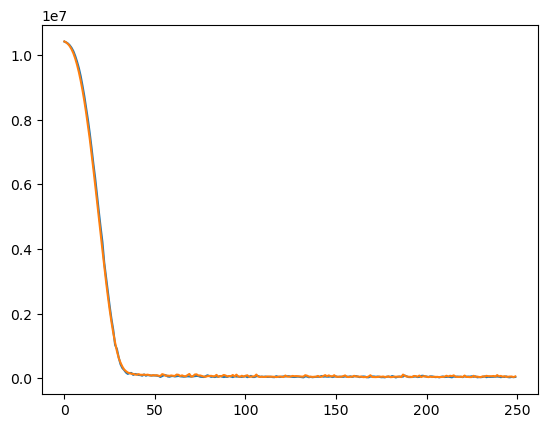

In [23]:
import matplotlib.pyplot as plt
plt.plot(tr_err)
plt.plot(ts_err)

# early stopping

In [24]:
nn = Sequential()
nn.add(Dense(100,input_dim=len(xtrain.columns)))
nn.add(Dropout(0.1))
nn.add(Dense(100))
nn.add(Dropout(0.1))
nn.add(Dense(100))
nn.add(Dropout(0.1))
nn.add(Dense(1))

from keras.callbacks import EarlyStopping
es = EarlyStopping(patience=10)
nn.compile(loss="mse")
model = nn.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=250,callbacks=es)

Epoch 1/250
2/2 [==============================] - 1s 140ms/step - loss: 10410354.0000 - val_loss: 10409362.0000
Epoch 2/250
2/2 [==============================] - 0s 23ms/step - loss: 10379477.0000 - val_loss: 10370646.0000
Epoch 3/250
2/2 [==============================] - 0s 24ms/step - loss: 10334519.0000 - val_loss: 10311804.0000
Epoch 4/250
2/2 [==============================] - 0s 24ms/step - loss: 10268590.0000 - val_loss: 10226155.0000
Epoch 5/250
2/2 [==============================] - 0s 24ms/step - loss: 10170312.0000 - val_loss: 10107341.0000
Epoch 6/250
2/2 [==============================] - 0s 23ms/step - loss: 10032891.0000 - val_loss: 9951616.0000
Epoch 7/250
2/2 [==============================] - 0s 24ms/step - loss: 9864374.0000 - val_loss: 9764284.0000
Epoch 8/250
2/2 [==============================] - 0s 23ms/step - loss: 9657087.0000 - val_loss: 9542370.0000
Epoch 9/250
2/2 [==============================] - 0s 23ms/step - loss: 9435625.0000 - val_loss: 9287258.000

2/2 [==============================] - 0s 20ms/step - loss: 65163.7930 - val_loss: 73998.9141
Epoch 77/250
2/2 [==============================] - 0s 21ms/step - loss: 43491.8711 - val_loss: 67439.4141
Epoch 78/250
2/2 [==============================] - 0s 22ms/step - loss: 51940.8008 - val_loss: 61684.2422
Epoch 79/250
2/2 [==============================] - 0s 22ms/step - loss: 44243.8672 - val_loss: 70052.4688
Epoch 80/250
2/2 [==============================] - 0s 24ms/step - loss: 43255.6172 - val_loss: 49273.3203
Epoch 81/250
2/2 [==============================] - 0s 22ms/step - loss: 47358.4023 - val_loss: 100331.2188
Epoch 82/250
2/2 [==============================] - 0s 23ms/step - loss: 44905.5781 - val_loss: 51433.1328
Epoch 83/250
2/2 [==============================] - 0s 23ms/step - loss: 55903.0234 - val_loss: 46076.0469
Epoch 84/250
2/2 [==============================] - 0s 23ms/step - loss: 57234.0898 - val_loss: 89443.5938
Epoch 85/250
2/2 [==============================]

# training using entire data

In [25]:
nn = Sequential()
nn.add(Dense(100,input_dim=len(xtrain.columns)))
nn.add(Dropout(0.1))
nn.add(Dense(100))
nn.add(Dropout(0.1))
nn.add(Dense(100))
nn.add(Dropout(0.1))
nn.add(Dense(1))

from keras.callbacks import EarlyStopping
es = EarlyStopping(patience=10)
nn.compile(loss="mse")
model = nn.fit(Xnew,Y,validation_data=(xtest,ytest),epochs=250,callbacks=es)

Epoch 1/250
2/2 [==============================] - 1s 139ms/step - loss: 10409618.0000 - val_loss: 10404325.0000
Epoch 2/250
2/2 [==============================] - 0s 23ms/step - loss: 10379385.0000 - val_loss: 10363668.0000
Epoch 3/250
2/2 [==============================] - 0s 23ms/step - loss: 10332676.0000 - val_loss: 10302114.0000
Epoch 4/250
2/2 [==============================] - 0s 23ms/step - loss: 10266273.0000 - val_loss: 10215758.0000
Epoch 5/250
2/2 [==============================] - 0s 23ms/step - loss: 10170318.0000 - val_loss: 10099372.0000
Epoch 6/250
2/2 [==============================] - 0s 23ms/step - loss: 10051908.0000 - val_loss: 9952630.0000
Epoch 7/250
2/2 [==============================] - 0s 23ms/step - loss: 9889332.0000 - val_loss: 9771649.0000
Epoch 8/250
2/2 [==============================] - 0s 22ms/step - loss: 9697685.0000 - val_loss: 9554670.0000
Epoch 9/250
2/2 [==============================] - 0s 22ms/step - loss: 9470765.0000 - val_loss: 9304625.000

2/2 [==============================] - 0s 21ms/step - loss: 67646.7188 - val_loss: 23007.8789
Epoch 77/250
2/2 [==============================] - 0s 21ms/step - loss: 62623.4141 - val_loss: 23163.8711
Epoch 78/250
2/2 [==============================] - 0s 21ms/step - loss: 57607.4688 - val_loss: 27208.1016
Epoch 79/250
2/2 [==============================] - 0s 20ms/step - loss: 74055.6484 - val_loss: 26838.6680
Epoch 80/250
2/2 [==============================] - 0s 22ms/step - loss: 50371.1875 - val_loss: 22243.4453
Epoch 81/250
2/2 [==============================] - 0s 23ms/step - loss: 56170.0156 - val_loss: 22285.1348
Epoch 82/250
2/2 [==============================] - 0s 22ms/step - loss: 42466.7891 - val_loss: 21023.9766
Epoch 83/250
2/2 [==============================] - 0s 22ms/step - loss: 47683.2969 - val_loss: 20298.4570
Epoch 84/250
2/2 [==============================] - 0s 22ms/step - loss: 49351.4141 - val_loss: 51644.6719
Epoch 85/250
2/2 [==============================] 

# Prediction

In [28]:
B=pd.read_csv("C:/Users/Suja4/OneDrive/Documents/Data Science/Dataset/test.csv")
B.isna().sum()

id                    0
Manufacturer          0
Model                 0
Type                  0
Min.Price             0
Price                 0
Max.Price             0
MPG.city              0
MPG.highway           0
AirBags               0
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        0
Luggage.room          2
Origin                0
Make                  0
dtype: int64

In [29]:
x = round(A['Luggage.room'].mean(),2)
B['Luggage.room'] = B['Luggage.room'].fillna(x)

In [30]:
#B.isna().sum()
B = B.drop(labels=["id","Model","Make"],axis=1)

In [32]:
cat1,con1 = catcon(B)

con1.remove("Cylinders")
cat1.append("Cylinders")

In [33]:
X2 = pd.get_dummies(B[cat1])
X1 = pd.DataFrame(mm.transform(B[con1]),columns=con)
Xnew2 = X1.join(X2)

In [34]:
len(Xnew.columns),len(Xnew2.columns)

(60, 44)

In [35]:
#Xnew2[Xnew.columns]

In [36]:
Q = ['Manufacturer_Audi', 'Manufacturer_Eagle', 'Manufacturer_Mitsubishi', 'Cylinders_8', 'Manufacturer_Honda', 'Manufacturer_BMW', 'Manufacturer_Chevrolet', 'Manufacturer_Dodge', 'Manufacturer_Nissan', 'Manufacturer_Ford', 'Manufacturer_Buick', 'Manufacturer_Cadillac', 'Manufacturer_Acura', 'Manufacturer_Geo', 'Manufacturer_Mercedes-Benz', 'Cylinders_rotary', 'Manufacturer_Lexus', 'Manufacturer_Mazda', 'Cylinders_6', 'Cylinders_4', 'Manufacturer_Infiniti', 'Manufacturer_Hyundai', 'Manufacturer_Lincoln', 'Manufacturer_Chrylser', 'Manufacturer_Chrysler', 'Manufacturer_Mercury']

In [37]:
for i in Q:
    Xnew2[i]=0

In [38]:
final_DF = Xnew2[Xnew.columns]

In [39]:
pred = nn.predict(final_DF)

1/1 [==============================] - 0s 66ms/step


In [40]:
pred

array([[3134.9114],
       [2343.7346],
       [2196.6572],
       [2329.2834],
       [2738.8499],
       [2773.4841],
       [3036.9597],
       [2705.5203],
       [2203.1057],
       [1738.1266],
       [2372.757 ],
       [2667.1995],
       [1996.5095],
       [2019.0688],
       [2457.2966],
       [2614.0056],
       [3285.6736],
       [1795.1196],
       [3052.8347],
       [2642.5095],
       [2472.0552],
       [2674.3633],
       [2829.4573]], dtype=float32)